## NN Adv Assignment

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F

### TensorFlow

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

### Load Data

test.csv에 label이 존재하지 않기에, keras에 있는 fashion_mnist 데이터셋의 테스트 셋을 불러왔다.

In [72]:
#train = pd.read_csv('Train.csv')
# test = pd.read_csv('Test.csv')

In [73]:
#train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [74]:
#train['label'].nunique()

10

In [75]:
# test.head()

In [76]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

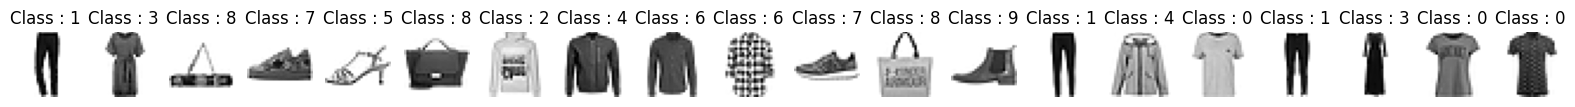

In [77]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
  plt.title(f'Class : {y[idx]}')

In [85]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### 1. 전처리 + Train-Test Split

주어진 데이터를 먼저 전처리 해주고, Split을 진행

이때, 이전에 과제에서 사용했던 `train_test_split()`함수 활용

In [86]:
from sklearn.model_selection import train_test_split

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train, X_value, y_train, y_value = train_test_split(X_train, y_train, test_size=0.25)

In [87]:
# 전처리 : reshape 진행
X_train = X_train.reshape(-1, 784)
X_value = X_value.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

### 2. 모델 구성 및 구간 별 함수 활용

3개의 layer로 구성된 Neural Network 모델에,

- Activation Function : ReLU 함수 적용
- Weight Initialization : GlorotUniform 함수 활용 -> Xavier Initialization과 같다고 함 ! [참고한 내용](https://reniew.github.io/13/) 
- Batch Normalization : 은닉층 사이마다 적용.
- Dropout : 0.2만 떨궈서 Overfitting을 방지
- Optimizer : Adam 알고리즘을 활용하고, lr은 0.001로 적용. [참고한 내용](https://wikidocs.net/36033)

등을 적용해서 만들어보겠다.

+) 

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotUniform

model = Sequential([
    # 입력층과 은닉층 1, input dimension이 784인 이유는, 28 * 28 이기 때문이다.
    Dense(512, input_dim=784, activation='relu', kernel_initializer=GlorotUniform()),
    BatchNormalization(),
    Dropout(0.2),
    
    # 은닉층 2
    Dense(256, activation='relu', kernel_initializer=GlorotUniform()),
    BatchNormalization(),
    Dropout(0.2),
    
    # 출력층
    Dense(10, activation='softmax')
])

# Adam optimizer
opt = Adam(learning_rate=0.001)

# 모델 컴파일
# 이때는 0ne-Hot encoding이 된 상황이 아니기에, loss function으로 sparse_cateforical_crossentropy를 사용했다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# 모델 구조 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_10 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_11 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 256)              

### 3. 모델 학습 진행

`fit()` 함수를 통해 모델학습을 진행.

이때, `epoch`는 100, 그리고 `batch_size`는 128로 지정.

In [91]:
# 빠른 학습 종료를 위해 Early Stopping 추가
from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping 설정
early_stopping = EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_value, y_value), callbacks=[early_stopping])

Epoch 1/100
352/352 [==============================] - 2s 7ms/step - loss: 0.2813 - accuracy: 0.8948 - val_loss: 0.3195 - val_accuracy: 0.8812
Epoch 2/100
352/352 [==============================] - 3s 7ms/step - loss: 0.2740 - accuracy: 0.8971 - val_loss: 0.3718 - val_accuracy: 0.8654
Epoch 3/100
352/352 [==============================] - 3s 7ms/step - loss: 0.2699 - accuracy: 0.8987 - val_loss: 0.3273 - val_accuracy: 0.8849
Epoch 4/100
352/352 [==============================] - 3s 7ms/step - loss: 0.2698 - accuracy: 0.8984 - val_loss: 0.4905 - val_accuracy: 0.8337
Epoch 5/100
352/352 [==============================] - 3s 8ms/step - loss: 0.2618 - accuracy: 0.9008 - val_loss: 0.3239 - val_accuracy: 0.8855
Epoch 6/100
352/352 [==============================] - 3s 9ms/step - loss: 0.2569 - accuracy: 0.9024 - val_loss: 0.3003 - val_accuracy: 0.8929
Epoch 7/100
352/352 [==============================] - 3s 8ms/step - loss: 0.2533 - accuracy: 0.9042 - val_loss: 0.3016 - val_accuracy: 0.8920

### 4. 모델 평가

테스트 데이터를 통해서, 모델 평가를 진행.

In [92]:
[loss, accuracy] = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.34408581256866455
Test accuracy: 0.8805000185966492
